## **Bank Marketing Data set analytics**

In [82]:
#importing requried Libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [83]:
#read csv file
banking_df = pd.read_csv('/content/DSA Data Set.csv')


In [84]:
#Printing first 5 rows of dataset
banking_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,ModelPrediction,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.932750,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.953579,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.945724,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.933875,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.940996,no


In [85]:
#Checking total number of columns and records in data and 
print('Shape of dataframe :',banking_df.shape)

Shape of dataframe : (41188, 22)


In [86]:
#Checking dtype of all the columns
banking_df.dtypes

age                  int64
job                 object
marital             object
education           object
default             object
housing             object
loan                object
contact             object
month               object
day_of_week         object
duration             int64
campaign             int64
pdays                int64
previous             int64
poutcome            object
emp.var.rate       float64
cons.price.idx     float64
cons.conf.idx      float64
euribor3m          float64
nr.employed        float64
ModelPrediction    float64
y                   object
dtype: object

### **Exploratory Data Analytics**

In [87]:
#Statistical summary of data
banking_df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,ModelPrediction
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.887597
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.125351
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.250174
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.857484
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.945879
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.959214
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,0.988360


In [88]:
#Checking null values in dataset
banking_df.isnull().sum()

age                0
job                0
marital            0
education          0
default            0
housing            0
loan               0
contact            0
month              0
day_of_week        0
duration           0
campaign           0
pdays              0
previous           0
poutcome           0
emp.var.rate       0
cons.price.idx     0
cons.conf.idx      0
euribor3m          0
nr.employed        0
ModelPrediction    0
y                  0
dtype: int64

In [89]:
# Extracting categorical variables from dataset.
# Data majorly contains 2 types of variable numberic and categorical. Data having dtype "Object" is Categorical variable

cat_col = [n for n in banking_df.columns if banking_df[n].dtypes == 'object']
cat_col

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'y']

In [90]:
#Obtaining the value count of each category column 
for col in cat_col:
    print(col, '\n')
    print(banking_df[col].value_counts())
    print("======================" * 2)

job 

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64
marital 

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64
education 

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64
default 

no         32588
unknown     8597
yes            3
Name: default, dtype: int64
housing 

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64
loan 

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64
contact 

cellular     26144
telephone    15044
N

Percentage of subsription :  11.265417111780131
Percentage of no subscription :  88.73458288821988


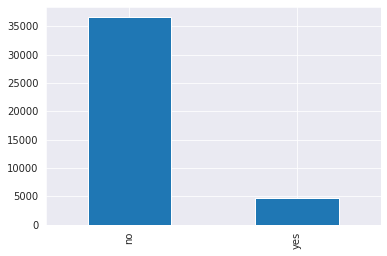

In [91]:
#Check the percentage of subscriber to non subscriber
No_sub = len(banking_df[banking_df['y'] == 'no'])
Sub = len(banking_df[banking_df['y'] == 'yes'])
percent_No_sub = (No_sub/len(banking_df['y'])) * 100
percent_sub = (Sub/len(banking_df['y'])) * 100

print('Percentage of subsription : ',percent_sub)
print('Percentage of no subscription : ', percent_No_sub)


df['y'].value_counts().plot.bar()

### **Data Visualization**

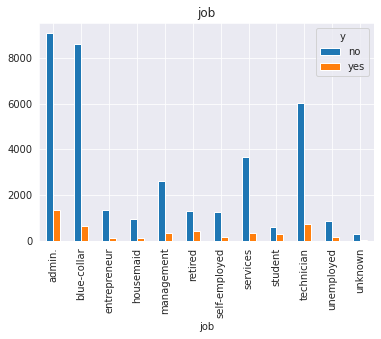

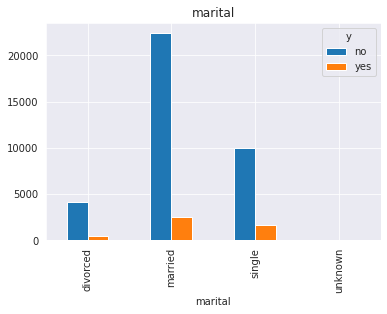

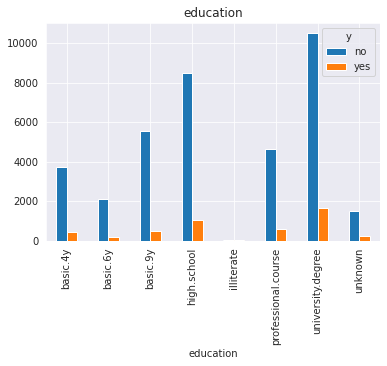

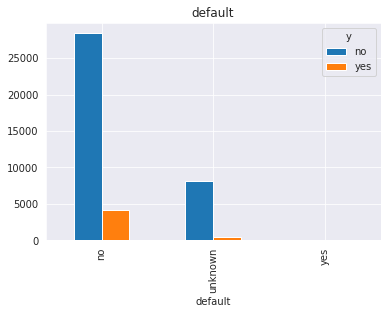

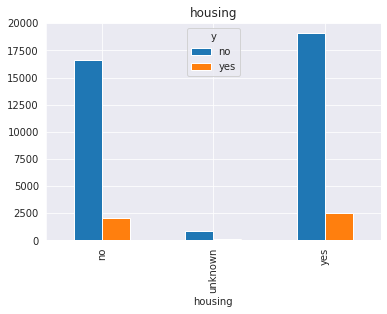

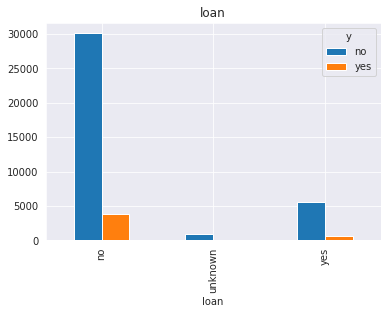

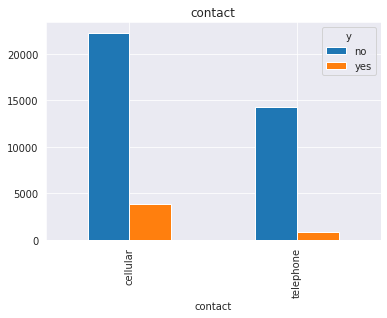

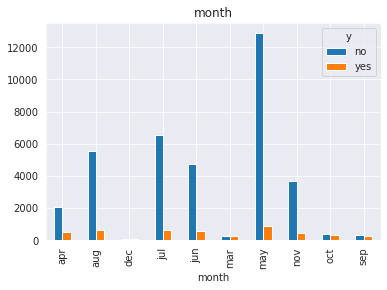

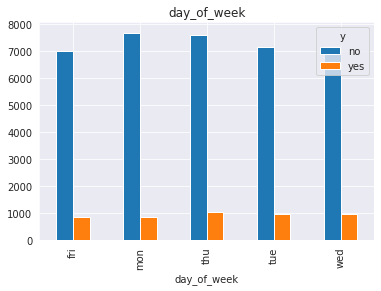

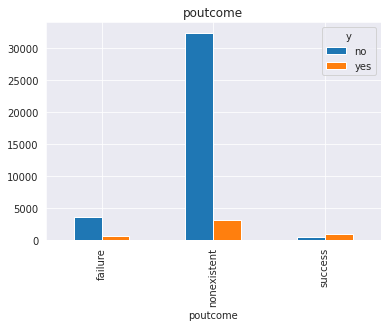

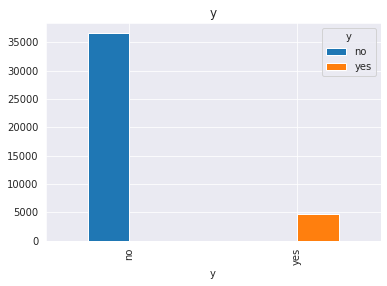

In [92]:
#Visualization from our categorical datas top see if we can get insigts from there
for col in cat_col:
    pd.crosstab(banking_df[col], banking_df.y).plot(kind = 'bar')
    plt.title(col)

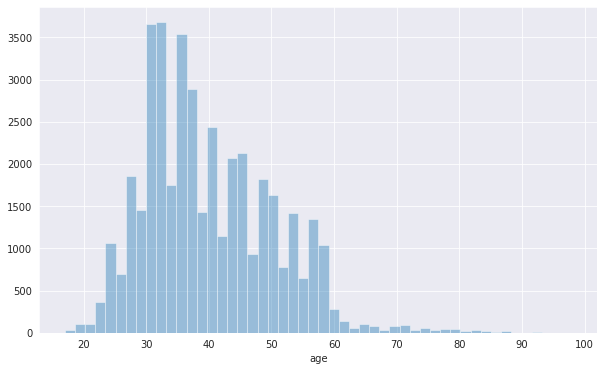

In [93]:
#Distribution of age in dataset
plt.figure(figsize = (10,6))
sns.distplot(a = df['age'], kde = False)

In [94]:
#Deleting model prediction column from dataset
del banking_df['ModelPrediction']

In [95]:
y1 = df['y']

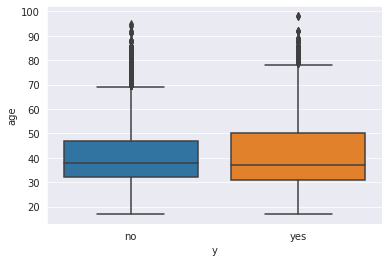

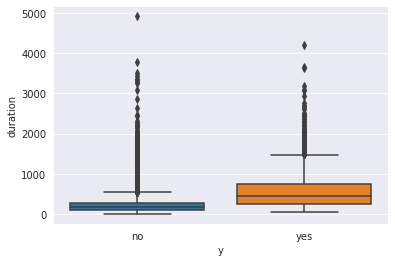

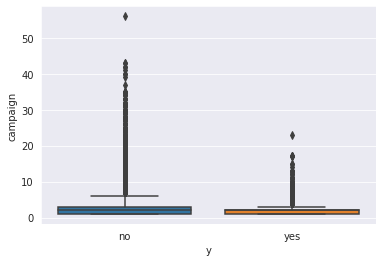

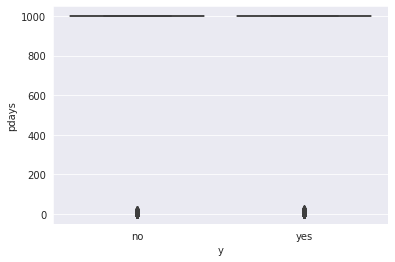

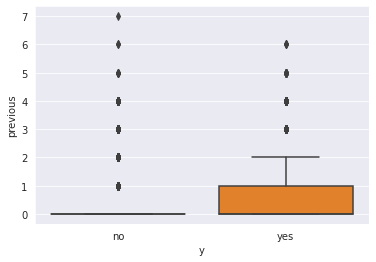

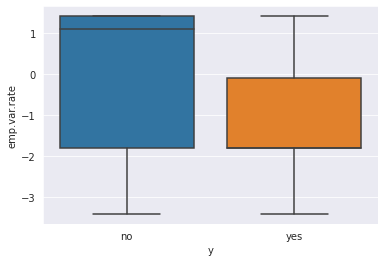

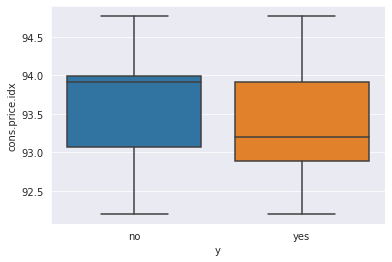

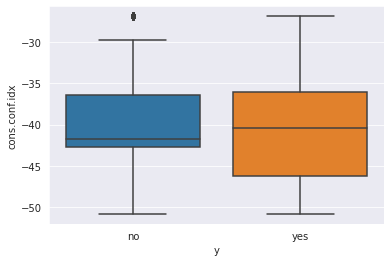

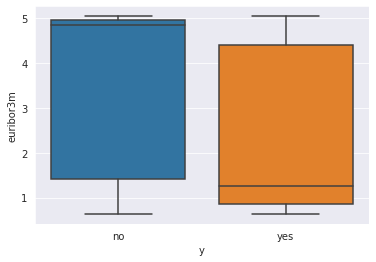

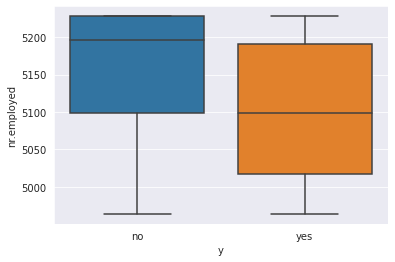

In [96]:
#Exploratory Data Analysis
#for numerical variable

num_var = ["age","duration","campaign", "pdays", "previous","emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed"]

for i in num_var:
  sns.boxplot(x = y1,y = i,data = banking_df)
  plt.show();


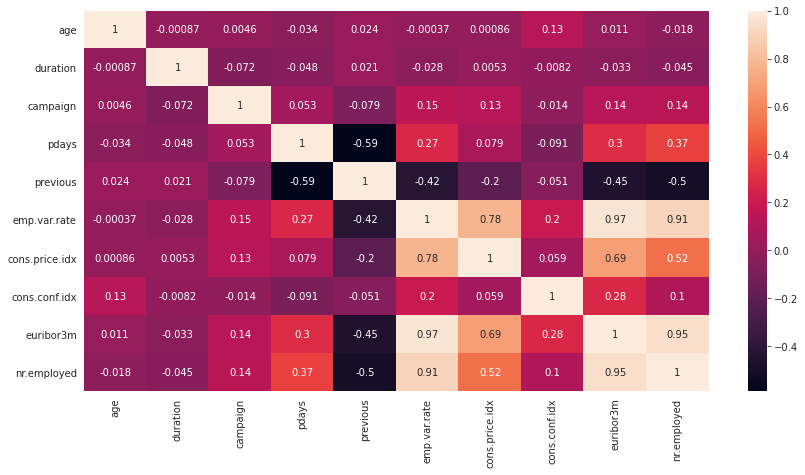

In [97]:
#correlation matrix to check correlation between variables
plt.figure(figsize=(14,7))
corr = banking_df.corr()
sns.heatmap(corr, annot=True)
plt.show()

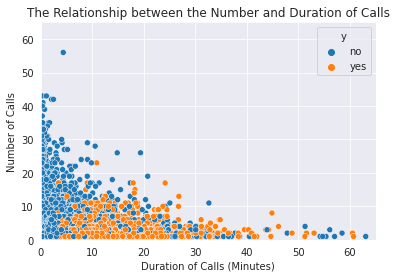

In [99]:
#Scatter plot to check dependency of dependent variable on Number of calls and Duration of calls
banking_df['duration'] = banking_df['duration'].apply(lambda n:n/60).round(2)
duration_campaign = sns.scatterplot(x='duration', y='campaign',data = banking_df,
                     hue = 'y')

plt.axis([0,65,0,65])
plt.ylabel('Number of Calls')
plt.xlabel('Duration of Calls (Minutes)')
plt.title('The Relationship between the Number and Duration of Calls')
# Annotation
plt.show()

### **Feature Selection**

In [103]:
#Create dummy variable for the categorical data and drop first column to avoid dummy varibale trap
bank_df = pd.get_dummies(banking_df,columns = ['job','marital','education','default',
                                   'housing','loan','month',
                                   'day_of_week','poutcome'], drop_first = True)

In [105]:
bank_df.shape

(41188, 54)

In [113]:
#Advisable to always split your data before using oversampling techniques
contact = ({'cellular':0, 'telephone':1})
bank_df['contact'] = df['contact'].map(contact)
X = bank_df.loc[:,bank_df.columns != 'y']
y = bank_df.loc[:,bank_df.columns == 'y']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2 , random_state = 0)

In [110]:
print('shape of X_train : ',len(X_train), '\nshape of y_train : ',len(y_train))
print('\nshape of X_test  : ',len(X_test), '\nshape of y_test  : ',len(y_test))

shape of X_train :  32950 
shape of y_train :  32950

shape of X_test  :  8238 
shape of y_test  :  8238


In [116]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### **Modeling**

In [117]:
#train model using logistic regression
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train,y_train)
clf.score(X_train,y_train)

0.9103490136570561

In [118]:
clf.score(X_test,y_test)

0.9150279193979121

In [120]:
y_pred = clf.predict(X_test)
y_pred

array(['no', 'no', 'no', ..., 'yes', 'no', 'no'], dtype=object)

### **Metrices Used for evaluation**

In [121]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[7109,  210],
       [ 490,  429]])

In [122]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          no       0.94      0.97      0.95      7319
         yes       0.67      0.47      0.55       919

    accuracy                           0.92      8238
   macro avg       0.80      0.72      0.75      8238
weighted avg       0.91      0.92      0.91      8238

